<a href="https://colab.research.google.com/github/SmrutiRanjan27/worldbank-global-education-analysis/blob/main/Smruti_Ranjan_WorldBank_Global_Education_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data.

Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/EdStatsData.csv'
df_stats = pd.read_csv(file_path)

## **Preliminary Analysis**

In [4]:
# lets look at basic info of the EdstatsData.csv
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

We have data for years starting from 2020 to 2100. Lets look at the details !

In [5]:
df_stats[['Country Name','Indicator Name','2085']][~df_stats['2085'].isna()]

,Country Name,Indicator Name,2085
91309,World,Wittgenstein Projection: Mean years of schooli...,2.70
91310,World,Wittgenstein Projection: Mean years of schooli...,2.70
91311,World,Wittgenstein Projection: Mean years of schooli...,2.70
91312,World,Wittgenstein Projection: Mean years of schooli...,12.10
91313,World,Wittgenstein Projection: Mean Years of Schooli...,0.10
...,...,...,...
886917,Zimbabwe,Wittgenstein Projection: Population in thousan...,91.70
886918,Zimbabwe,Wittgenstein Projection: Population in thousan...,205.47
886919,Zimbabwe,Wittgenstein Projection: Population in thousan...,3378.61
886920,Zimbabwe,Wittgenstein Projection: Population in thousan...,2924.73


In [6]:
df_stats['Indicator Name'][~df_stats['2085'].isna()].unique().shape

(308,)

The columns with year values from 2020 to 2100 have non-null values which stores the information of preojected values of various Wittgenstein indicators

In [7]:
df_stats[df_stats['Country Name']=='Arab World']['Indicator Code']

0                 UIS.NERA.2
1               UIS.NERA.2.F
2             UIS.NERA.2.GPI
3               UIS.NERA.2.M
4                SE.PRM.TENR
                ...         
3660        UIS.LP.AG15T24.M
3661       SE.ADT.1524.LT.ZS
3662    SE.ADT.1524.LT.FE.ZS
3663    SE.ADT.1524.LT.FM.ZS
3664    SE.ADT.1524.LT.MA.ZS
Name: Indicator Code, Length: 3665, dtype: object

In [8]:
# lets look at the number of unique countries
df_stats['Country Name'].unique().shape

(242,)

In [9]:
# lets look at the number of unique indicators in the dataset
df_stats['Indicator Name'].unique().shape

(3665,)

In [10]:
#lets see if multiplying these two values gives us the total number of entries
3665*242

886930

**We have 242 countries and each of these countries have 3665 indicators !**

In [11]:
df_stats.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Just trying to get an idea of the dataset
df_stats[['Indicator Name','Indicator Code']][:10].values

array([['Adjusted net enrolment rate, lower secondary, both sexes (%)',
        'UIS.NERA.2'],
       ['Adjusted net enrolment rate, lower secondary, female (%)',
        'UIS.NERA.2.F'],
       ['Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
        'UIS.NERA.2.GPI'],
       ['Adjusted net enrolment rate, lower secondary, male (%)',
        'UIS.NERA.2.M'],
       ['Adjusted net enrolment rate, primary, both sexes (%)',
        'SE.PRM.TENR'],
       ['Adjusted net enrolment rate, primary, female (%)',
        'SE.PRM.TENR.FE'],
       ['Adjusted net enrolment rate, primary, gender parity index (GPI)',
        'UIS.NERA.1.GPI'],
       ['Adjusted net enrolment rate, primary, male (%)',
        'SE.PRM.TENR.MA'],
       ['Adjusted net enrolment rate, upper secondary, both sexes (%)',
        'UIS.NERA.3'],
       ['Adjusted net enrolment rate, upper secondary, female (%)',
        'UIS.NERA.3.F']], dtype=object)

**Lets look at the second dataset EdStatsCountry.csv**

In [13]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/EdStatsCountry.csv'
df_stats_country = pd.read_csv(file_path)

In [14]:
df_stats_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [15]:
# What are the different feature columns
df_stats_country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [16]:
df_stats_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

**We have economic stats for 241 of 242 countries in the EdStatsCountry dataset**

In [17]:
df_stats_country['Country Code'].unique()

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG', 'ARM',
       'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHI',
       'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV',
       'CRI', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA',
       'DNK', 'DOM', 'DZA', 'EAP', 'EAS', 'ECA', 'ECS', 'ECU', 'EGY',
       'EMU', 'ERI', 'ESP', 'EST', 'ETH', 'EUU', 'FIN', 'FJI', 'FRA',
       'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB',
       'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HIC',
       'HKG', 'HND', 'HPC', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAC',
       'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LCN', 'LDC', 'LIC', 'LIE',
       'LKA', 'LMC',

**Lets look at the third datset and get some info about EdStatsSeries !**

In [18]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/EdStatsSeries.csv'
df_series = pd.read_csv(file_path)

In [19]:
df_series.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [20]:
df_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

**So we have got detailed information about the each of 3665 indicators in EdStatsData in this dataset named EdstatsSeries.csv**

In [21]:
df_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# lets see if series code of EdStatsSeries is same as indicator code column of EdStatsData.csv
len(set(df_stats['Indicator Code'].unique())&set(df_series['Series Code']))

3612

**So we have detailed information of about 3612 of 3665 indicators in this dataset**

**I am curious about the periodicity and base period column, since we see a lot of NA values of a lot years for most of the indicators in EdStatsData dataset. This column might give us a clue about that !**

In [23]:
df_series[~df_series['Base Period'].isna()]['Base Period'].unique()

array(['2010', '2011', 'Projections (2010 to 2100)', '14'], dtype=object)

In [24]:
df_series[df_series['Base Period']=='Projections (2010 to 2100)'].shape[0]

308

**The number of indicators pertaining to only the projections data from 2010 to 2100 are 308 same as what we observed in EdStatsData.csv where we tried to see number unique indicators value for the years 2020-2100. Hence there are 308 rows for each country with projection data.**

In [25]:
df_series[~df_series['Periodicity'].isna()]['Periodicity'].unique()

array(['Annual'], dtype=object)

In [26]:
# Lets look at the series codes that are collected annually
annual_indicators = df_series[df_series['Periodicity'] == 'Annual']['Series Code'].values

**Lets look at the fourth data in EdStatsCountry-Series.csv**

In [27]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/EdStatsCountry-Series.csv'
df_country_series = pd.read_csv(file_path)

In [28]:
df_country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [29]:
df_country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


**Lets look at the fifth data in EdStatsSeries.csv**

In [30]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/EdStatsFootNote.csv'
df_footnote = pd.read_csv(file_path)

In [31]:
df_footnote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [32]:
df_footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


### Preliminary Observations from all datasets :


1.   df_stats_country contains a list of all the 241 countries and their economic stats 
2.   df_stats_data contains data for combination of each country and 3665 indicators from 1970 to 2100
3.   df_series contains detailed information about most of the indicators in df_stats_data
4.   df_country_series contains some basic information about all the indicators estimated for certain countries
5.   df_footnote contains information about uncertaininty and origin of data series used for the indicators for each year








# ***Data Cleaning***

In [33]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [34]:
# lets take only those rows in data that are in the interval 2010-2011 that are not null for any of the values
cols = []
cols.extend(['Country Name','Country Code','Indicator Name','Indicator Code'])
check_cols = list(np.arange(2000,2011,1).astype(str))
cols.extend(check_cols)
df_stats_new = df_stats[cols][~df_stats[check_cols].isna().any(axis=1)]

In [35]:
df_stats_new.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,73.275620,75.132980,76.641022,77.653580,78.485397,79.475769,79.608330,80.582420,81.473801,81.695686,82.871651
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.904060,0.912750,0.919790,0.926300,0.927680,0.930840,0.929620,0.938460,0.942500,0.943470,0.947620
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,81.051369,82.315048,83.324059,83.832230,84.604393,85.380287,85.635078,85.866692,86.444138,86.590691,87.452583
12,Arab World,ARB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,70.737579,73.594200,74.976158,75.328583,76.428513,76.131767,75.222557,75.595695,74.893944,74.814552,76.197044


In [36]:
df_stats_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81572 entries, 4 to 886613
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    81572 non-null  object 
 1   Country Code    81572 non-null  object 
 2   Indicator Name  81572 non-null  object 
 3   Indicator Code  81572 non-null  object 
 4   2000            81572 non-null  float64
 5   2001            81572 non-null  float64
 6   2002            81572 non-null  float64
 7   2003            81572 non-null  float64
 8   2004            81572 non-null  float64
 9   2005            81572 non-null  float64
 10  2006            81572 non-null  float64
 11  2007            81572 non-null  float64
 12  2008            81572 non-null  float64
 13  2009            81572 non-null  float64
 14  2010            81572 non-null  float64
dtypes: float64(11), object(4)
memory usage: 10.0+ MB


In [37]:
df_stats_new.shape

(81572, 15)

In [38]:
df_stats_new['Indicator Name'].unique().shape

(1110,)

In [39]:
df_stats_new['Country Name'].unique().shape

(242,)

In [40]:
# This function checks for a particular keyord in the set of indicators
def check_features(df,strings):
  indicators = list(df['Indicator Name'].unique())
  req_indicators = []
  for indicator in indicators:
    for string in strings:
      if string in indicator:
        req_indicators.append(indicator)
  return req_indicators

In [41]:
df_stats_new['Indicator Name'].unique()[:10]

array(['Adjusted net enrolment rate, primary, both sexes (%)',
       'Adjusted net enrolment rate, primary, female (%)',
       'Adjusted net enrolment rate, primary, gender parity index (GPI)',
       'Adjusted net enrolment rate, primary, male (%)',
       'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
       'Adult illiterate population, 15+ years, % female',
       'Adult illiterate population, 15+ years, both sexes (number)',
       'Adult illiterate population, 15+ years, female (number)',
       'Adult illiterate population, 15+ years, male (number)',
       'Adult literacy rate, population 15+ years, both sexes (%)'],
      dtype=object)

***As discussed today during the brain storming session, I'll focussing on the role of expenditures in education !***

In [42]:
# lets check for indicators that are related to expenditure
req_indicators = check_features(df_stats_new,['expenditure'])

In [43]:
req_indicators

['Expenditure on education as % of total government expenditure (%)',
 'Expenditure on lower secondary as % of government expenditure on education (%)',
 'Expenditure on lower secondary as % of total government expenditure (%)',
 'Expenditure on pre-primary as % of government expenditure on education (%)',
 'Expenditure on pre-primary as % of total government expenditure (%)',
 'Expenditure on primary as % of government expenditure on education (%)',
 'Expenditure on primary as % of total government expenditure (%)',
 'Expenditure on secondary as % of government expenditure on education (%)',
 'Expenditure on secondary as % of total government expenditure (%)',
 'Expenditure on tertiary as % of government expenditure on education (%)',
 'Expenditure on tertiary as % of total government expenditure (%)',
 'Expenditure on upper secondary as % of government expenditure on education (%)',
 'Expenditure on upper secondary as % of total government expenditure (%)',
 'Government expenditure i

**Lets try to visualize a couple of expenditure indicators and their role in India's education scenario!**

In [44]:
# First let us create a dataframe for india for years starting 1970 until 2018
cols = []
cols.extend(['Country Name','Country Code','Indicator Name','Indicator Code'])
check_cols = list(np.arange(1970,2018,1).astype(str))
cols.extend(check_cols)
df_stats_india = df_stats[df_stats['Country Name']=='India'].loc[:,cols]

In [45]:
df_stats_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3665 entries, 414145 to 417809
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3665 non-null   object 
 1   Country Code    3665 non-null   object 
 2   Indicator Name  3665 non-null   object 
 3   Indicator Code  3665 non-null   object 
 4   1970            416 non-null    float64
 5   1971            261 non-null    float64
 6   1972            141 non-null    float64
 7   1973            171 non-null    float64
 8   1974            159 non-null    float64
 9   1975            498 non-null    float64
 10  1976            156 non-null    float64
 11  1977            152 non-null    float64
 12  1978            152 non-null    float64
 13  1979            107 non-null    float64
 14  1980            495 non-null    float64
 15  1981            177 non-null    float64
 16  1982            147 non-null    float64
 17  1983            147 non-nu

In [46]:
# lets findout indicators corresponding to expenditure in this dataset now
exp_indicators = check_features(df_stats_india,['expenditure'])
exp_indicators

['All staff compensation as % of total expenditure in lower secondary public institutions (%)',
 'All staff compensation as % of total expenditure in post-secondary non-tertiary public institutions (%)',
 'All staff compensation as % of total expenditure in pre-primary public institutions (%)',
 'All staff compensation as % of total expenditure in primary public institutions (%)',
 'All staff compensation as % of total expenditure in public institutions (%)',
 'All staff compensation as % of total expenditure in secondary public institutions (%)',
 'All staff compensation as % of total expenditure in tertiary public institutions (%)',
 'All staff compensation as % of total expenditure in upper secondary public institutions (%)',
 'Capital expenditure as % of total expenditure in lower secondary public institutions (%)',
 'Capital expenditure as % of total expenditure in post-secondary non-tertiary public institutions (%)',
 'Capital expenditure as % of total expenditure in pre-primary 

In [47]:
# lets look at couple of these indicators one by one
param = 'Expenditure on education as % of total government expenditure (%)'
perct_exp_on_education_india = df_stats_india[df_stats_india['Indicator Name']==param]

In [48]:
perct_exp_on_education_india = perct_exp_on_education_india.dropna(axis=1)

Text(0, 0.5, '% govt. expenditure on education in india')

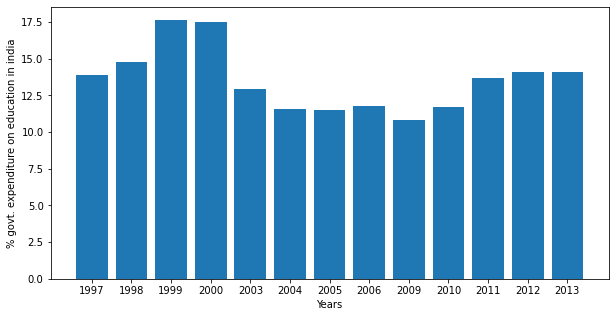

In [49]:
cols1 = perct_exp_on_education_india.columns.values[4:]
values1 = perct_exp_on_education_india.iloc[:,4:].values[0]
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(cols1,values1)
plt.xlabel('Years')
plt.ylabel('% govt. expenditure on education in india')

***Since Primary education holds a very important step for education india, lets look at what percentage of total expenditures does indian governement spend on primary education ! ***

In [50]:
param = 'Expenditure on primary as % of total government expenditure (%)'
perct_exp_on_primary_india = df_stats_india[df_stats_india['Indicator Name']==param]

In [51]:
perct_exp_on_primary_india = perct_exp_on_primary_india.dropna(axis=1)

Text(0, 0.5, '% educational expenditure on primary education in india')

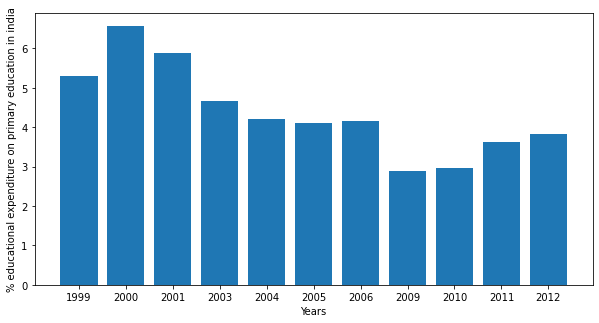

In [52]:
cols2 = perct_exp_on_primary_india.columns.values[4:]
values2 = perct_exp_on_primary_india.iloc[:,4:].values[0]
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(cols2,values2)
plt.xlabel('Years')
plt.ylabel('% educational expenditure on primary education in india')

***OBSERVATION : The expenditure trend on education by indian government seems to be high during 2000s. However it sshowed a decreasing trend over the years and hit its lowest in the year 2008. SInce then, the government has been slowly increasing its expenditures. Same trend is observed in primary education as well !***

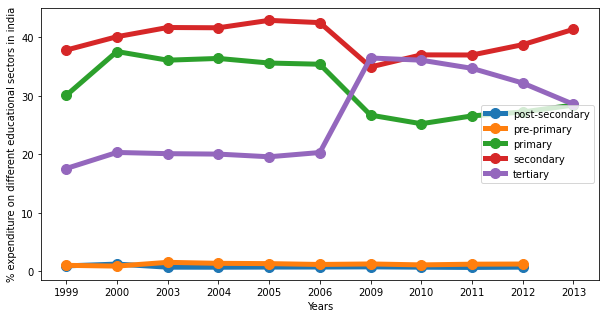

In [53]:
# Now lets see on which sector of education does indian government spends most of its expenditure on in various years
params = [ 'Expenditure on post-secondary non-tertiary as % of government expenditure on education (%)', 
 'Expenditure on pre-primary as % of government expenditure on education (%)', 
 'Expenditure on primary as % of government expenditure on education (%)', 
 'Expenditure on secondary as % of government expenditure on education (%)', 
 'Expenditure on tertiary as % of government expenditure on education (%)']
 
for param in params:
  df = df_stats_india[df_stats_india['Indicator Name']==param]
  df = df.dropna(axis=1)
  cols2 = df.columns.values[4:]
  values2 = df.iloc[:,4:].values[0]
  plt.plot(cols2,values2,'.-',label=param.split()[2],linewidth=5,markersize=20)
 
plt.rcParams['figure.figsize'] = (10,5)
plt.xlabel('Years')
plt.ylabel('% expenditure on different educational sectors in india')
plt.legend(loc='best')

***From the results, we observe that Indian government has invested a significant percentage of expenditure on primary and secondary education in early 2000s. However around 2008, the focus of Indian governement shifted more towards tertiary education, evident from the steep rise of tertiary sector expenditure percentages. However the percentage of expenditure made on pre-primary and post-secondary education had been all time low.***

**Lets look at a developed country stats of expenditure !**

In [54]:
cols = []
cols.extend(['Country Name','Country Code','Indicator Name','Indicator Code'])
check_cols = list(np.arange(1970,2018,1).astype(str))
cols.extend(check_cols)
df_stats_us = df_stats[df_stats['Country Name']=='United States'].loc[:,cols]

In [55]:
exp_indicators = check_features(df_stats_us,['expenditure'])

In [56]:
# lets look at couple of these indicators one by one
param = 'Expenditure on education as % of total government expenditure (%)'
perct_exp_on_education_us = df_stats_us[df_stats_us['Indicator Name']==param]

In [57]:
perct_exp_on_education_us = perct_exp_on_education_us.dropna(axis=1)

Text(0, 0.5, '% govt. expenditure on education in USA')

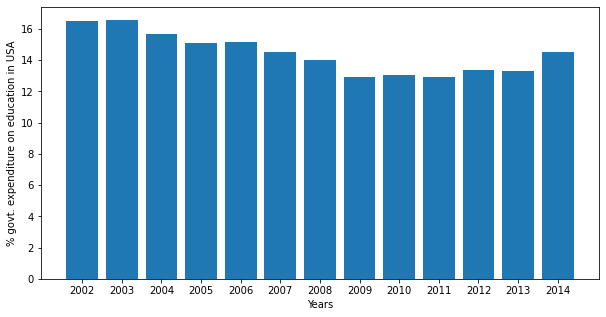

In [58]:
cols1 = perct_exp_on_education_us.columns.values[4:]
values1 = perct_exp_on_education_us.iloc[:,4:].values[0]
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(cols1,values1)
plt.xlabel('Years')
plt.ylabel('% govt. expenditure on education in USA')

**Comparatively, USA spends a larger percentage of its resources on education. The expenditure made has been consistent over the years !**

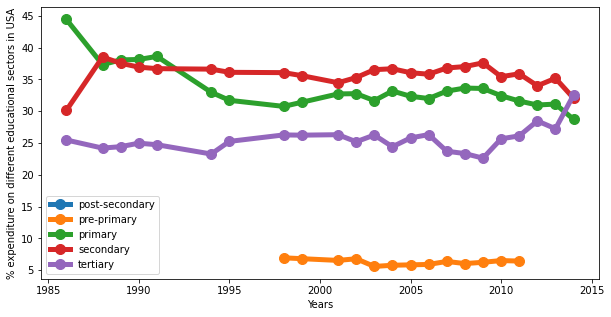

In [59]:
# Now lets see on which sector of education does USA government spends most of its expenditure on in various years
params = [ 'Expenditure on post-secondary non-tertiary as % of government expenditure on education (%)', 
 'Expenditure on pre-primary as % of government expenditure on education (%)', 
 'Expenditure on primary as % of government expenditure on education (%)', 
 'Expenditure on secondary as % of government expenditure on education (%)', 
 'Expenditure on tertiary as % of government expenditure on education (%)']
 
for param in params:
  df = df_stats_us[df_stats_us['Indicator Name']==param]
  df = df.dropna(axis=1)
  cols2 = np.array(df.columns.values[4:],dtype=int)
  args = np.argsort(cols2)
  cols2 = cols2[args]
  values2 = df.iloc[:,4:].values[0][args]
  plt.plot(cols2,values2,'.-',label=param.split()[2],linewidth=5,markersize=20)
 
plt.rcParams['figure.figsize'] = (10,5)
plt.xlabel('Years')
plt.ylabel('% expenditure on different educational sectors in USA')
plt.legend(loc='best')

**The expenditure distribution in different sectors have been consistent over the years. US government has invested almost equal resources in primary and secondary education ~ 35%. Tertiary sector has seen no focus until around 2010 when it showed some improvement in resources investment.**

**Now It might be a good idea to look at a group of countries based on their econmoic status and income groups**

In [60]:
df_stats_country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [61]:
df_stats_country['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

***Lets divide the countries based on income levels !***

In [62]:
# low income countries
low_income_countries = df_stats_country[df_stats_country['Income Group'] == 'Low income']['Short Name'].values
low_income_countries

array(['Afghanistan', 'Burundi', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Central African Republic', 'Dem. Rep. Congo', 'Comoros',
       'Eritrea', 'Ethiopia', 'Guinea', 'The Gambia', 'Guinea-Bissau',
       'Haiti', 'Kenya', 'Cambodia', 'Liberia', 'Madagascar', 'Mali',
       'Myanmar', 'Mozambique', 'Malawi', 'Niger', 'Nepal',
       "Dem. People's Rep. Korea", 'Rwanda', 'Sierra Leone', 'Somalia',
       'Chad', 'Togo', 'Tajikistan', 'Tanzania', 'Uganda', 'Zimbabwe'],
      dtype=object)

In [63]:
# high income countries
high_income_countries = df_stats_country[(df_stats_country['Income Group'] == 'High income: nonOECD')|(df_stats_country['Income Group'] == 'High income: nonOECD')]['Short Name'].values
high_income_countries

array(['Aruba', 'Andorra', 'United Arab Emirates', 'Antigua and Barbuda',
       'Bahrain', 'The Bahamas', 'Bermuda', 'Barbados', 'Brunei',
       'Channel Islands', 'Curaçao', 'Cayman Islands', 'Cyprus',
       'Faeroe Islands', 'Equatorial Guinea', 'Greenland', 'Guam',
       'Hong Kong SAR, China', 'Croatia', 'Isle of Man',
       'St. Kitts and Nevis', 'Kuwait', 'Liechtenstein', 'Lithuania',
       'Latvia', 'Macao SAR, China', 'St. Martin (French part)', 'Monaco',
       'Malta', 'Northern Mariana Islands', 'New Caledonia', 'Oman',
       'Puerto Rico', 'French Polynesia', 'Qatar', 'Russia',
       'Saudi Arabia', 'Singapore', 'San Marino',
       'Sint Maarten (Dutch part)', 'Turks and Caicos Islands',
       'Trinidad and Tobago', 'Uruguay', 'Virgin Islands'], dtype=object)

In [64]:
# upper middle income countries
upper_middle_income_countries = df_stats_country[df_stats_country['Income Group'] == 'Upper middle income']['Short Name'].values
upper_middle_income_countries

array(['Angola', 'Albania', 'Argentina', 'American Samoa', 'Azerbaijan',
       'Bulgaria', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
       'Brazil', 'Botswana', 'China', 'Colombia', 'Costa Rica', 'Cuba',
       'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Fiji',
       'Gabon', 'Grenada', 'Hungary', 'Iran', 'Iraq', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Lebanon', 'Libya', 'St. Lucia', 'Maldives',
       'Mexico', 'Marshall Islands', 'Macedonia', 'Montenegro',
       'Mauritius', 'Malaysia', 'Namibia', 'Panama', 'Peru', 'Palau',
       'Romania', 'Serbia', 'Suriname', 'Seychelles', 'Thailand',
       'Turkmenistan', 'Tonga', 'Tunisia', 'Turkey', 'Tuvalu',
       'St. Vincent and the Grenadines', 'Venezuela', 'South Africa'],
      dtype=object)

In [65]:
# lower middle income countries
lower_middle_income_countries = df_stats_country[df_stats_country['Income Group'] == 'Lower middle income']['Short Name'].values
lower_middle_income_countries

array(['Armenia', 'Bolivia', 'Bhutan', "Côte d'Ivoire", 'Cameroon',
       'Congo', 'Cabo Verde', 'Djibouti', 'Egypt', 'Micronesia',
       'Georgia', 'Ghana', 'Guatemala', 'Guyana', 'Honduras', 'Indonesia',
       'India', 'Kyrgyz Republic', 'Kiribati', 'Lao PDR', 'Sri Lanka',
       'Lesotho', 'Morocco', 'Moldova', 'Mongolia', 'Mauritania',
       'Nigeria', 'Nicaragua', 'Pakistan', 'Philippines',
       'Papua New Guinea', 'Paraguay', 'West Bank and Gaza', 'Sudan',
       'Senegal', 'Solomon Islands', 'El Salvador', 'South Sudan',
       'São Tomé and Principe', 'Swaziland', 'Syrian Arab Republic',
       'Timor-Leste', 'Ukraine', 'Uzbekistan', 'Vietnam', 'Vanuatu',
       'Samoa', 'Kosovo', 'Yemen', 'Zambia'], dtype=object)

In [66]:
# lets look at the expenditure stats on education
param = 'Expenditure on education as % of total government expenditure (%)'
df_stats_income = df_stats_country[['Short Name','Income Group']].merge(df_stats,how='inner',left_on='Short Name',right_on='Country Name')
cols = []
cols.extend(['Country Name','Country Code','Indicator Name','Indicator Code','Income Group'])
check_cols = list(np.arange(1980,2016,1).astype(str))
cols.extend(check_cols)
df_stats_income = df_stats_income[df_stats_income['Indicator Name']==param].loc[:,cols]
df_stats_income.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Income Group,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1224,Aruba,ABW,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.08239,19.278919,21.82276,21.320391,19.757151,NaN,14.89786,18.900709,NaN,20.788799,19.0362,21.53726,22.14366,21.745461,20.634081,21.87459,19.61272,NaN
4889,Afghanistan,AFG,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.06756,16.048429,10.356800,14.10280,14.46593,12.509
8554,Angola,AGO,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.11468,NaN,5.25508,NaN,NaN,NaN,NaN,7.992350,7.45479,NaN,NaN,NaN,8.68477,NaN,NaN,NaN,NaN,NaN
12219,Albania,ALB,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.15339,9.62407,9.682460,10.13703,10.581930,9.886920,10.5736,10.70316,11.357970,10.93295,11.177190,NaN,NaN,NaN,NaN,NaN,12.12391,NaN,NaN
15884,Andorra,AND,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# segregating by income group
df_stats_income = df_stats_income.groupby('Income Group').mean(numeric_only=True).reset_index()
df_stats_income

,Income Group,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,High income: OECD,9.86202,12.504603,12.130647,11.810438,11.611166,11.801761,10.770641,11.105272,11.451651,11.841510,11.434508,11.495079,11.235582,11.822350,12.130374,11.867995,12.257408,14.849012,12.021295,12.211700,12.204363,12.247493,12.848179,12.861737,12.911588,12.782765,12.807163,12.673730,12.448379,12.539314,12.349883,12.448027,12.830921,12.810519,12.626716,16.924807
1,High income: nonOECD,NaN,NaN,NaN,NaN,NaN,18.872935,NaN,13.007410,5.134120,9.214427,16.338135,10.956727,12.115220,23.167340,15.140178,13.033105,12.682469,10.565900,13.048797,12.839586,13.184188,15.402744,14.192271,14.275971,13.547643,14.789766,14.366262,14.753808,15.416118,13.769568,14.243740,14.918625,15.636615,15.170465,12.777722,11.021270
2,Low income,8.80957,11.340110,12.829633,12.556595,13.163038,12.633263,12.325263,10.468430,13.826855,16.955250,11.165555,13.668388,16.114674,12.580358,17.180600,23.792440,13.365066,13.247550,13.159652,16.219899,16.252123,16.481811,16.073757,17.347246,16.172885,17.390315,17.407625,17.250990,17.050245,16.046089,15.243707,16.194509,16.873154,17.145567,17.547063,16.522003
3,Lower middle income,7.64188,15.750565,11.403620,29.410770,10.411655,15.642519,34.309200,15.043743,20.333977,20.239710,15.667555,15.543310,11.933500,17.096389,14.510869,16.235796,17.157364,14.387823,16.318512,17.222022,15.194084,16.902070,17.830061,19.309880,16.223807,16.597818,17.289690,16.757209,16.810479,15.780061,16.090144,15.371403,15.436796,14.836380,15.882870,16.264975
4,Upper middle income,NaN,NaN,NaN,11.945080,17.591260,16.339422,18.630219,11.843924,14.581162,17.140110,13.852915,15.758717,15.037463,14.474498,19.861245,19.587727,17.280535,18.389943,13.567727,16.601603,16.360639,16.433134,15.580334,16.657366,15.353941,15.446717,14.945151,15.256135,15.527755,15.313694,14.980024,14.033270,14.702002,14.734559,15.148338,16.371983


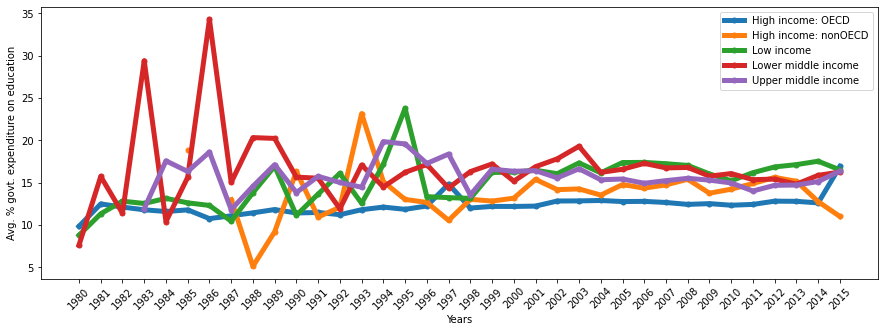

In [68]:
# plotting the graph for each income group
for i in range(5):
  cols = df_stats_income.columns.values[1:]
  values = df_stats_income.iloc[i].values[1:]
  plt.rcParams['figure.figsize'] = (15,5)
  plt.plot(cols,values,'.-',label=df_stats_income.iloc[i,0],linewidth=5,markersize=10)
  plt.xlabel('Years')
  plt.ylabel('Avg. % govt. expenditure on education')
  plt.xticks(rotation=45)
  plt.legend()